In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Display settings
pd.set_option('display.max_columns', None)


In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\LENOVO THINKPAD 13\Downloads\EDA2 (1)\adult_with_headers.csv")

# Display first few rows
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Dataset shape
print("Shape of dataset:", df.shape)

# Data types and non-null info
df.info()

# Summary statistics for numeric columns
df.describe()


Shape of dataset: (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Check again
df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Impute categorical with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute numerical with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Check again
df.isnull().sum()


C:\Users\LENOVO THINKPAD 13\AppData\Local\Temp\ipykernel_10928\2376601821.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\LENOVO THINKPAD 13\AppData\Local\Temp\ipykernel_10928\2376601821.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

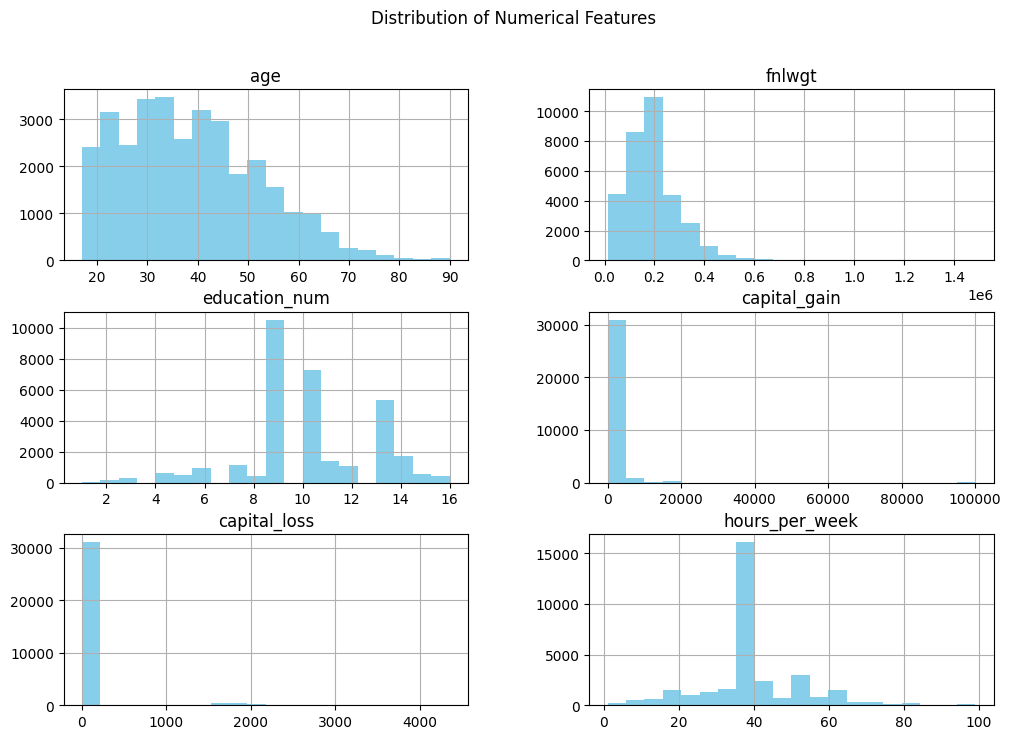

In [7]:
# Plot distribution of numerical columns
df[num_cols].hist(figsize=(12,8), bins=20, color='skyblue')
plt.suptitle('Distribution of Numerical Features')
plt.show()


C:\Users\LENOVO THINKPAD 13\AppData\Local\Temp\ipykernel_10928\1507953291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette='Set2')


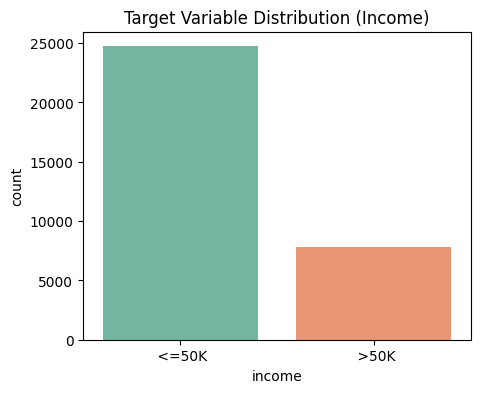

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x='income', data=df, palette='Set2')
plt.title('Target Variable Distribution (Income)')
plt.show()


In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [10]:
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[num_cols] = scaler_standard.fit_transform(df[num_cols])

df_standard_scaled[num_cols].head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [11]:
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = scaler_minmax.fit_transform(df[num_cols])

df_minmax_scaled[num_cols].head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [13]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols


Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [14]:
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique categories")


workclass: 9 unique categories
education: 16 unique categories
marital_status: 7 unique categories
occupation: 15 unique categories
relationship: 6 unique categories
race: 5 unique categories
sex: 2 unique categories
native_country: 42 unique categories
income: 2 unique categories


In [15]:
# Selecting columns with less than 5 unique categories
one_hot_cols = [col for col in cat_cols if df[col].nunique() < 5]
print("One-Hot Encoding will be applied on:", one_hot_cols)

# Applying One-Hot Encoding
df_onehot = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

df_onehot.head()


One-Hot Encoding will be applied on: ['sex', 'income']


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,True,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,True,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,True,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,True,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,False,False


In [16]:
# Selecting columns with more than 5 categories
label_cols = [col for col in cat_cols if df[col].nunique() >= 5]
print("Label Encoding will be applied on:", label_cols)

# Creating a copy of the dataset
df_encoded = df_onehot.copy()
le = LabelEncoder()

for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


Label Encoding will be applied on: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,True,False
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,True,False
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,True,False
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,True,False
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,False,False


In [17]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   capital_gain    32561 non-null  int64
 10  capital_loss    32561 non-null  int64
 11  hours_per_week  32561 non-null  int64
 12  native_country  32561 non-null  int64
 13  sex_ Male       32561 non-null  bool 
 14  income_ >50K    32561 non-null  bool 
dtypes: bool(2), int64(13)
memory usage: 3.3 MB


In [18]:
df_encoded.head()
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   capital_gain    32561 non-null  int64
 10  capital_loss    32561 non-null  int64
 11  hours_per_week  32561 non-null  int64
 12  native_country  32561 non-null  int64
 13  sex_ Male       32561 non-null  bool 
 14  income_ >50K    32561 non-null  bool 
dtypes: bool(2), int64(13)
memory usage: 3.3 MB


In [19]:
# Display all column names to identify exact ones
print(df_encoded.columns.tolist())


['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'sex_ Male', 'income_ >50K']


In [20]:
# Creating new engineered features using correct column names
df_encoded['capital_diff'] = df_encoded['capital_gain'] - df_encoded['capital_loss']
df_encoded['hours_per_week_ratio'] = df_encoded['hours_per_week'] / df_encoded['age']

# Display first few rows to confirm new features
df_encoded[['age', 'capital_gain', 'capital_loss', 'capital_diff', 'hours_per_week', 'hours_per_week_ratio']].head()


,age,capital_gain,capital_loss,capital_diff,hours_per_week,hours_per_week_ratio
0,39,2174,0,2174,40,1.025641
1,50,0,0,0,13,0.260000
2,38,0,0,0,40,1.052632
3,53,0,0,0,40,0.754717
4,28,0,0,0,40,1.428571


In [21]:
# Check skewness of numerical columns
skew_values = df_encoded.select_dtypes(include=['int64', 'float64']).skew().sort_values(ascending=False)
print(skew_values)


capital_gain            11.953848
capital_diff            11.871934
capital_loss             4.594629
fnlwgt                   1.446980
relationship             0.786818
hours_per_week_ratio     0.747581
age                      0.558743
hours_per_week           0.227643
occupation               0.114583
marital_status          -0.013508
education_num           -0.311676
workclass               -0.752024
education               -0.934042
race                    -2.435386
native_country          -3.658303
dtype: float64


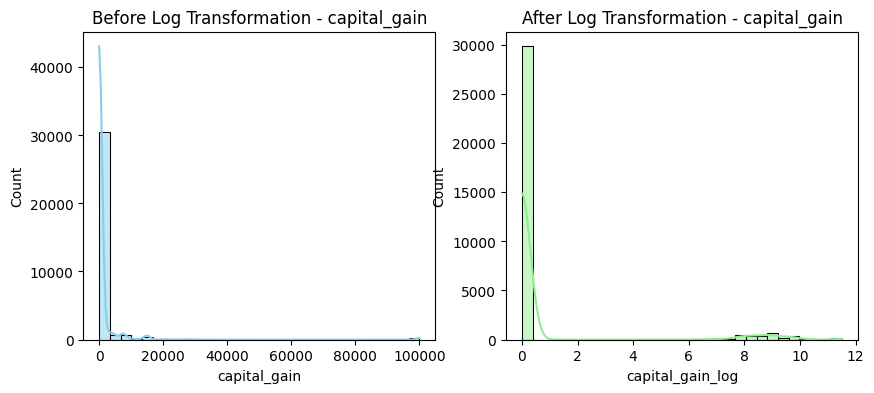

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log transformation to reduce skewness
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])
df_encoded['capital_loss_log'] = np.log1p(df_encoded['capital_loss'])

# Compare before vs after transformation visually
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df_encoded['capital_gain'], bins=30, ax=ax[0], color='skyblue', kde=True)
ax[0].set_title('Before Log Transformation - capital_gain')
sns.histplot(df_encoded['capital_gain_log'], bins=30, ax=ax[1], color='lightgreen', kde=True)
ax[1].set_title('After Log Transformation - capital_gain')
plt.show()


In [28]:
%whos DataFrame


Variable             Type         Data/Info
-------------------------------------------
df                   DataFrame           age          workc<...>[32561 rows x 15 columns]
df_encoded           DataFrame           age  workclass  fn<...>[32561 rows x 19 columns]
df_minmax_scaled     DataFrame                age          <...>[32561 rows x 15 columns]
df_onehot            DataFrame           age          workc<...>[32561 rows x 15 columns]
df_standard_scaled   DataFrame                age          <...>[32561 rows x 15 columns]


In [29]:
df_cleaned = df_encoded.copy()


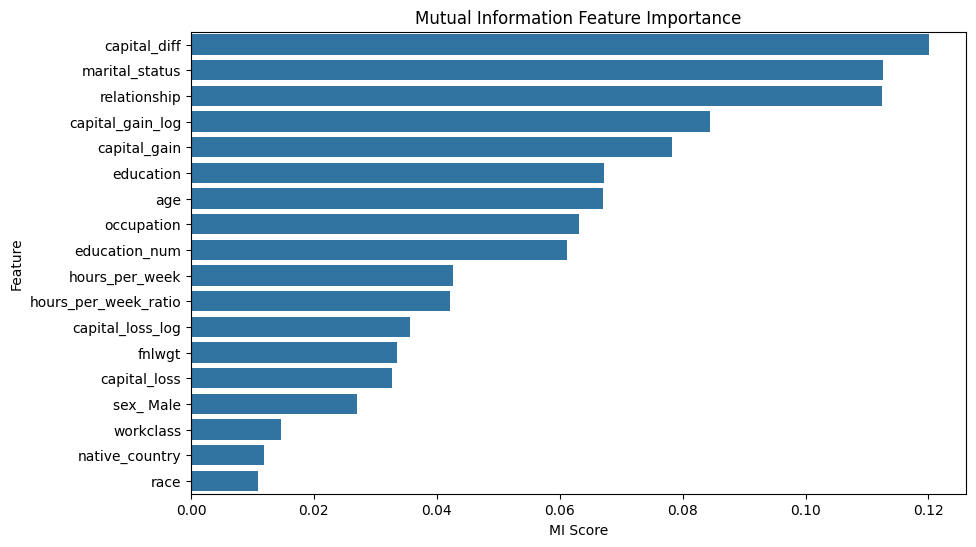

,Feature,MI Score
14,capital_diff,0.120110
5,marital_status,0.112612
7,relationship,0.112461
16,capital_gain_log,0.084447
9,capital_gain,0.078196
3,education,0.067264
0,age,0.067081
6,occupation,0.063109
4,education_num,0.061205
11,hours_per_week,0.042710


In [30]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Separate numeric and categorical features
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Prepare data
X = df_cleaned.drop('income_ >50K', axis=1)
y = df_cleaned['income_ >50K']

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create DataFrame for easy viewing
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=mi_df, x='MI Score', y='Feature')
plt.title('Mutual Information Feature Importance')
plt.show()
mi_df
